In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
import datetime as dt
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [15]:
ABC = engine.execute(text('SELECT date, prcp FROM Measurement WHERE date >= "2016-08-23"')).fetchall()
print(ABC)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [16]:
sql_query = pd.DataFrame(ABC, columns = ['date', 'prcp'])
print(sql_query)

            date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]


2016-08-23


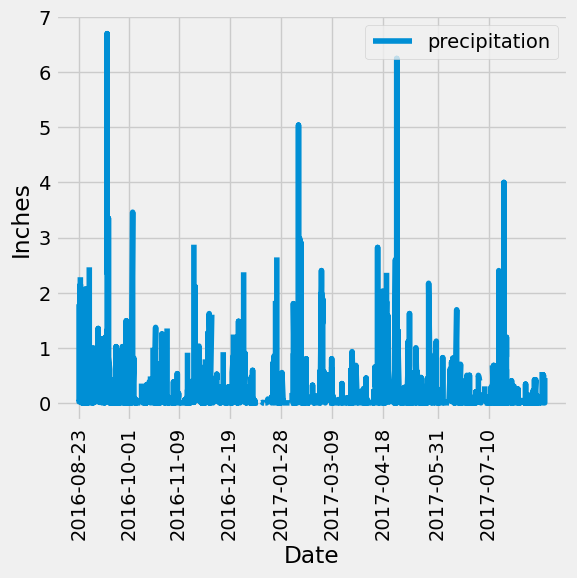

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
MR = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
import datetime as dt
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores
ABC = engine.execute(text('SELECT date, prcp FROM Measurement WHERE date >= "2016-08-23"')).fetchall()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

sql_query = pd.DataFrame(ABC, columns = ['date', 'precipitation'])
# Sort the dataframe by date
sql_query = sql_query.sort_values('date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
#ax = sql_query.plot.bar(x='date', y='prcp', rot = 0)
plt.figure(figsize=(6,6))
plt.plot(sql_query['date'],sql_query['precipitation'])
plt.xticks(['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10'])
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(['precipitation'],loc='upper right')
plt.tight_layout()
plt.show()



In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
sql_query['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [34]:
session.query(Station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
XYZ = engine.execute(text('SELECT * FROM Measurement')).fetchall()
pandas_bamboo = pd.DataFrame(XYZ)
pandas_bamboo['station'].value_counts()

#Station USC00519281 has the greatest number of observations.


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
Most_active_station = session.query(*sel).filter(Measurement.station == "USC00519281").all()
Most_active_station

[(54.0, 85.0, 71.66378066378067)]

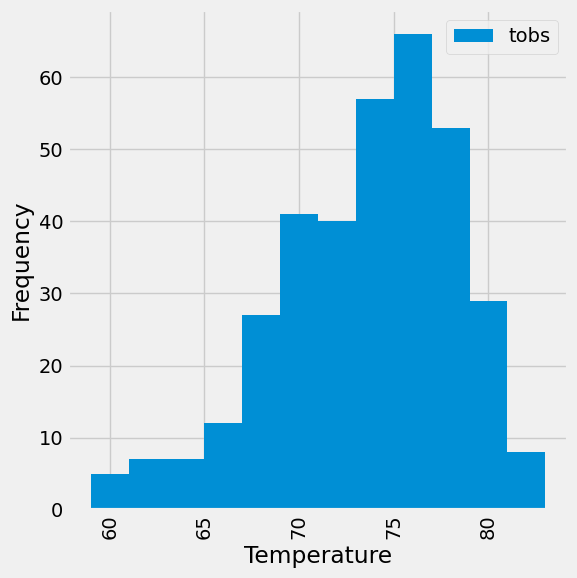

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

MASI = engine.execute(text('SELECT date,tobs FROM Measurement WHERE date >= "2016-08-23" AND station = "USC00519281"')).fetchall()


sql_query2 = pd.DataFrame(MASI, columns = ['date','tobs'])
# Sort the dataframe by tobs
sql_query2 = sql_query2.sort_values('date', ascending=False)

plt.figure(figsize=(6,6))
plt.hist(sql_query2['tobs'], bins=12)

plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(['tobs'],loc='upper right')
plt.tight_layout()
plt.show()

# Close Session

In [24]:
# Close Session
session.close()